In [1]:
cd Documents

[Errno 2] No such file or directory: 'Documents'
/home/saksham/Documents


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import seaborn as sns
from sklearn.model_selection import StratifiedKFold

In [3]:
train=pd.read_csv("Hackearth/DS_Anti_Social_v1/DS_SOCIAL_NETWORK_TEST/train.csv")
test=pd.read_csv("Hackearth/DS_Anti_Social_v1/DS_SOCIAL_NETWORK_TEST/test.csv")


In [4]:
train.head()

,uid,total_facebook_statuses,account_membership_period,service_support_calls,number_of_snaps,total_whatsapp_charge,sub_country_code,total_twitter_tweets,country,total_email_characters,...,social_account_number,total_whatsapp_msgs,total_facebook_charge,total_twitter_charge,snapchat_plan,total_email_charge,total_twitter_tweet_characters,total_emails,total_facebook_status_characters,turn_anti_social
0,0,84,141,0,37,14.69,415,111,WV,11.2,...,330-8173,97,43.96,18.87,yes,3.02,222.0,5,258.6,0
1,1,99,108,2,30,NaN,510,113,LA,9.8,...,380-7624,95,47.02,18.71,yes,2.65,220.1,6,276.6,0
2,2,111,96,1,0,9.22,415,105,MA,9.1,...,359-9369,91,29.56,24.43,no,2.46,287.4,7,173.9,0
3,3,100,105,0,0,11.04,415,108,NV,7.7,...,376-4540,140,38.83,12.33,no,2.08,145.1,7,228.4,0
4,4,92,59,1,0,5.15,510,88,CO,12.5,...,331-3842,89,26.11,17.47,no,3.38,205.5,10,153.6,0


# Exploring and Cleaning Data

In [5]:
train.columns

Index(['uid', 'total_facebook_statuses', 'account_membership_period',
       'service_support_calls', 'number_of_snaps', 'total_whatsapp_charge',
       'sub_country_code', 'total_twitter_tweets', 'country',
       'total_email_characters', 'email_plan', 'total_whatsapp_msg_characters',
       'social_account_number', 'total_whatsapp_msgs', 'total_facebook_charge',
       'total_twitter_charge', 'snapchat_plan', 'total_email_charge',
       'total_twitter_tweet_characters', 'total_emails',
       'total_facebook_status_characters', 'turn_anti_social'],
      dtype='object')

In [6]:
Y_train=train["turn_anti_social"]
train.drop("turn_anti_social",axis=1,inplace=True)
train.drop("uid",axis=1,inplace=True)

In [7]:
cat_var=[ i  for i in train.columns if train[i].dtype=="object" ]
cont_var=[i for i in train.columns if train[i].dtype!="object"]

In [8]:
train.describe()

,total_facebook_statuses,account_membership_period,service_support_calls,number_of_snaps,total_whatsapp_charge,sub_country_code,total_twitter_tweets,total_email_characters,total_whatsapp_msg_characters,total_whatsapp_msgs,total_facebook_charge,total_twitter_charge,total_email_charge,total_twitter_tweet_characters,total_emails,total_facebook_status_characters
count,2233.000000,2233.000000,2233.000000,2233.000000,2021.000000,2233.000000,2233.000000,2016.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2019.000000,2233.000000,2018.000000
mean,100.699955,100.511867,1.564263,8.069413,9.044572,436.746082,100.343932,10.244990,200.785132,99.876847,30.614344,17.094734,2.762064,201.945319,4.454993,179.861843
std,20.010022,39.901300,1.326769,13.725095,2.301464,42.135476,20.016748,2.790821,50.981357,19.544787,9.261162,4.309337,0.752724,50.509510,2.451659,54.084138
min,30.000000,1.000000,0.000000,0.000000,1.040000,408.000000,0.000000,0.000000,23.200000,33.000000,0.440000,0.000000,0.000000,0.000000,0.000000,2.600000
25%,88.000000,73.000000,1.000000,0.000000,7.500000,408.000000,87.000000,8.500000,166.700000,86.000000,24.430000,14.150000,2.300000,167.200000,3.000000,143.625000
50%,101.000000,99.000000,1.000000,0.000000,9.080000,415.000000,100.000000,10.300000,201.400000,100.000000,30.480000,17.110000,2.780000,202.900000,4.000000,179.200000
75%,114.000000,127.000000,2.000000,19.000000,10.620000,415.000000,114.000000,12.000000,235.400000,113.000000,36.750000,19.930000,3.240000,235.100000,6.000000,215.675000
max,165.000000,232.000000,9.000000,50.000000,17.770000,510.000000,170.000000,20.000000,395.000000,175.000000,58.960000,30.910000,5.400000,363.700000,18.000000,346.800000


In [9]:
train.isnull().sum(axis=0)/train.shape[0]

total_facebook_statuses             0.000000
account_membership_period           0.000000
service_support_calls               0.000000
number_of_snaps                     0.000000
total_whatsapp_charge               0.094940
sub_country_code                    0.000000
total_twitter_tweets                0.000000
country                             0.000000
total_email_characters              0.097179
email_plan                          0.000000
total_whatsapp_msg_characters       0.000000
social_account_number               0.000000
total_whatsapp_msgs                 0.000000
total_facebook_charge               0.000000
total_twitter_charge                0.000000
snapchat_plan                       0.000000
total_email_charge                  0.000000
total_twitter_tweet_characters      0.095835
total_emails                        0.000000
total_facebook_status_characters    0.096283
dtype: float64

In [10]:
cat_var

['country', 'email_plan', 'social_account_number', 'snapchat_plan']

In [133]:
train.shape

(2233, 20)

In [132]:
## exploring cateagorical variables
train["social_account_number"].value_counts().shape

(2233,)

In [11]:
cont_var

['total_facebook_statuses',
 'account_membership_period',
 'service_support_calls',
 'number_of_snaps',
 'total_whatsapp_charge',
 'sub_country_code',
 'total_twitter_tweets',
 'total_email_characters',
 'total_whatsapp_msg_characters',
 'total_whatsapp_msgs',
 'total_facebook_charge',
 'total_twitter_charge',
 'total_email_charge',
 'total_twitter_tweet_characters',
 'total_emails',
 'total_facebook_status_characters']

### Data is Imbalanced

In [12]:
Y_train.value_counts()

0    1910
1     323
Name: turn_anti_social, dtype: int64

In [13]:
## imputing with mean values
train.fillna(train.mean(),inplace=True)

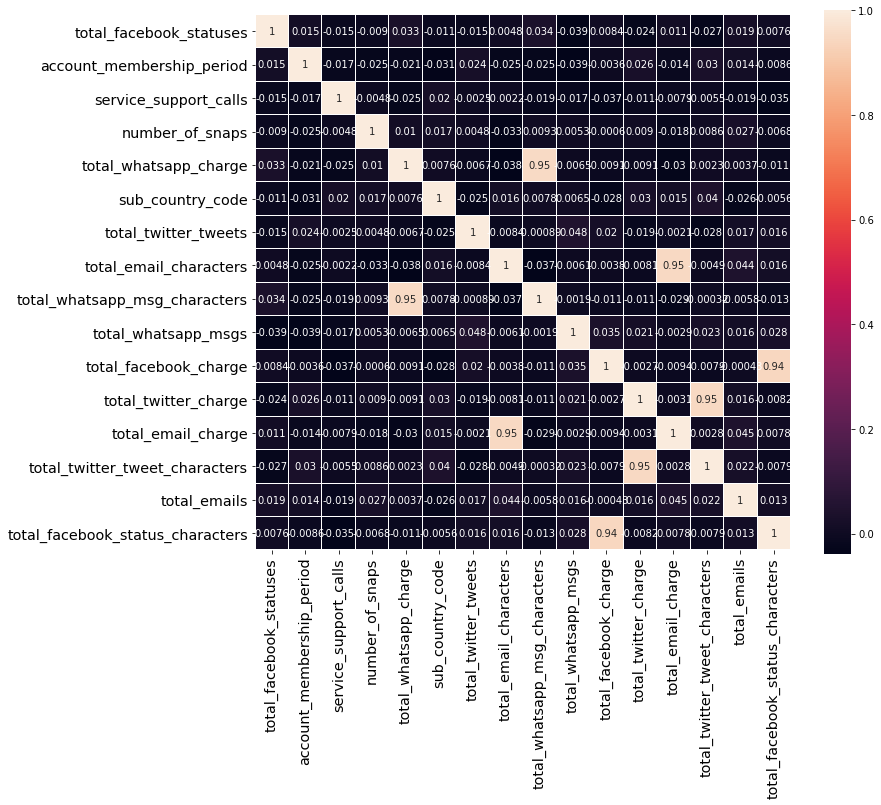

In [14]:
##Corellation plot
df=train[cont_var]
corr=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,square=True,linewidths=.15)
plt.xticks(label=cont_var,size='x-large',rotation='vertical')
plt.yticks(y=cont_var,size='x-large',rotation='horizontal')
plt.show()

In [15]:
from sklearn.metrics import f1_score
le=LabelEncoder()
from sklearn.neighbors import KNeighborsClassifier

In [33]:
X_train=train.copy()
X_test=test.copy()
X_test.drop("uid",axis=1,inplace=True)

In [34]:
train.shape[0]

2233

In [35]:
X_test.shape

(1100, 20)

In [36]:
## label encoding
for val in cat_var:
    print(val)
    final_col=X_train[val].append(X_test[val])
    final_col=le.fit_transform(final_col)
    X_train[val]=final_col[:train.shape[0]]
    X_test[val]=final_col[train.shape[0]:]
    
    

country
email_plan
social_account_number
snapchat_plan


In [37]:
X_tr, X_val, y_tr, y_val=train_test_split(X_train,Y_train,test_size=.25,stratify=Y_train)

In [38]:
X_tr.reset_index(inplace=True,drop=True)
y_tr.reset_index(inplace=True,drop=True)
X_val.reset_index(inplace=True,drop=True)
y_val.reset_index(inplace=True,drop=True)

In [101]:
X_tr.shape

(1674, 21)

In [83]:
X_val.shape

(559, 21)

In [20]:
y_tr.value_counts()

0    1432
1     242
Name: turn_anti_social, dtype: int64

In [19]:
y_val.value_counts()

0    478
1     81
Name: turn_anti_social, dtype: int64

# Model Building and Fine Tuning

## KNN

In [21]:
def nearest_neighbour(X_train,y_train,X_val,y_val,n=5,weight="uniform"):
    neigh=KNeighborsClassifier(n_neighbors=n,weights=weight)
    neigh.fit(X_train,y_train)
    pred=neigh.predict(X_val)
    #print(pred)
    s=f1_score(y_val,pred)
    print("score is {}".format(s))
    return neigh
    

In [112]:
classifier_knn=nearest_neighbour(X_tr,y_tr,X_val,y_val,n=3,weight="distance")

score is 0.09345794392523364


In [39]:
from sklearn.linear_model import LogisticRegression

## Logistic 

In [23]:
def Logistic(X_train,y_train,X_val,y_val,c=1,p="l2"):
    neigh=LogisticRegression(penalty=p,C=c)
    neigh.fit(X_train,y_train)
    pred=neigh.predict(X_val)
    #print(pred)
    s=f1_score(y_val,pred)
    print("score is {}".format(s))
    return neigh,s
    

In [127]:
score=0
best_C=0
for c in np.arange(0.01,1,0.01):
    classifier_logistic,s=Logistic(X_tr,y_tr,X_val,y_val,c=c,p="l2")
    if s>score:
        score=s
        best_C=c


score is 0.09195402298850575
score is 0.1348314606741573
score is 0.17391304347826084
score is 0.19354838709677416
score is 0.21052631578947367
score is 0.22916666666666663
score is 0.22680412371134023
score is 0.22448979591836732
score is 0.22448979591836732
score is 0.22448979591836732
score is 0.26
score is 0.26
score is 0.26
score is 0.3076923076923077
score is 0.26
score is 0.2745098039215686
score is 0.3076923076923077
score is 0.3076923076923077
score is 0.3238095238095238
score is 0.3076923076923077
score is 0.30476190476190473
score is 0.3364485981308411
score is 0.30476190476190473
score is 0.3333333333333333
score is 0.3207547169811321
score is 0.3486238532110092
score is 0.3207547169811321
score is 0.3207547169811321
score is 0.3486238532110092
score is 0.30476190476190473
score is 0.3486238532110092
score is 0.3018867924528302
score is 0.30476190476190473
score is 0.3207547169811321
score is 0.36363636363636365
score is 0.3018867924528302
score is 0.3018867924528302
score 

In [128]:
best_C

0.35000000000000003

In [132]:
classifier_logistic=Logistic(X_tr,y_tr,X_val,y_val,c=0.35000000000000003,p="l2")

score is 0.36363636363636365


## Ridge

In [22]:
from sklearn.linear_model import RidgeClassifier

In [25]:
def Ridge_clff(X_train,y_train,X_val,y_val,a=1.0):
    neigh=RidgeClassifier(alpha=a)
    neigh.fit(X_train,y_train)
    pred=neigh.predict(X_val)
    #print(pred)
    s=f1_score(y_val,pred)
    print("score is {}".format(s))
    return neigh,s
    

In [141]:
score=0
best_C=0
for c in np.arange(0.01,1,0.01):
    classifier_Ridge,s=Ridge_clff(X_tr,y_tr,X_val,y_val,a=0.2)
    if s>score:
        score=s
        best_C=c


score is 0.2127659574468085
score is 0.2127659574468085
score is 0.2127659574468085
score is 0.2127659574468085
score is 0.2127659574468085
score is 0.2127659574468085
score is 0.2127659574468085
score is 0.2127659574468085
score is 0.2127659574468085
score is 0.2127659574468085
score is 0.2127659574468085
score is 0.2127659574468085
score is 0.2127659574468085
score is 0.2127659574468085
score is 0.2127659574468085
score is 0.2127659574468085
score is 0.2127659574468085
score is 0.2127659574468085
score is 0.2127659574468085
score is 0.2127659574468085
score is 0.2127659574468085
score is 0.2127659574468085
score is 0.2127659574468085
score is 0.2127659574468085
score is 0.2127659574468085
score is 0.2127659574468085
score is 0.2127659574468085
score is 0.2127659574468085
score is 0.2127659574468085
score is 0.2127659574468085
score is 0.2127659574468085
score is 0.2127659574468085
score is 0.2127659574468085
score is 0.2127659574468085
score is 0.2127659574468085
score is 0.212765957

In [142]:
classifier_Ridge=Ridge_clff(X_tr,y_tr,X_val,y_val,a=1)

score is 0.19354838709677416


### Linear SVM

In [23]:
from sklearn.svm import SVC

In [24]:
def SVM_classifier(X_train,y_train,X_val,y_val,c=1.0):
    neigh=SVC(C=c,class_weight="balanced",kernel="linear")
    neigh.fit(X_train,y_train)
    pred=neigh.predict(X_val)
    print(pred)
    s=f1_score(y_val,pred)
    print("score is {}".format(s))
    return neigh,s
    

In [37]:
neigh=SVC(C=1.0,kernel="linear",class_weight="balanced")
neigh.fit(X_tr,y_tr)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
pred=neigh.predict(X_val)

In [39]:
s=f1_score(y_val,pred)

In [40]:
s

0.44520547945205485

## RandomForest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
def Rndmfrst_classifier(X_train,y_train,X_val,y_val,n=100,m=2):
    neigh= RandomForestClassifier(n_estimators=n,max_depth=m,class_weight=None)
    neigh.fit(X_train,y_train)
    pred=neigh.predict(X_val)
    #print(pred)
    s=f1_score(y_val,pred)
    print("score is {}".format(s))
    return neigh,s
    

In [27]:
classifier_rndm,s=Rndmfrst_classifier(X_tr,y_tr,X_val,y_val,n=500,m=None)

score is 0.7703703703703703


In [112]:
def Kfold_split(clf,X,y,X_test,n=5):
    kf=StratifiedKFold(n_splits=n)
    accuarcy=[]
    prediction=np.zeros(len(X_test))
    for tr_indices,tt_indices in kf.split(X,y):
        X_train,X_val=X.loc[tr_indices],X.loc[tt_indices]
        y_train,y_val=y.loc[tr_indices],y.loc[tt_indices]
        y_train.reset_index(drop=True,inplace=True)
        y_val.reset_index(drop=True,inplace=True)
        #print(y_train)
        clf.fit(X_train,y_train)
        pred=clf.predict(X_val)
        prediction+=clf.predict(X_test)
        
        #print(a)
        s=f1_score(y_val,pred)
        accuarcy.append(s)
    print(accuarcy)
    acc=sum(accuarcy)/len(accuarcy)
    print("Accuarcy is {}".format(acc))
    prediction=[1 if i>2 else 0 for i in prediction  ]##This depends on n_folds
    return (prediction,acc)
    
    

In [81]:
clf_rndm=RandomForestClassifier(n_estimators=500)
prediction,acc=Kfold_split(clf_rndm,X_train,Y_train,X_test)

[0.7000000000000001, 0.7706422018348624, 0.6862745098039216, 0.8347826086956521, 0.5283018867924528]
Accuarcy is 0.7040002414253779


In [82]:
prediction

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [86]:
sub=pd.DataFrame(test["uid"])
sub["turn_anti_social"]=prediction
sub.to_csv("Hackearth/DS_Anti_Social_v1/submission.csv",index=False)

In [87]:
sub.head()

,uid,turn_anti_social
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


## XGBOOST CLASSIFIER

In [40]:
from xgboost import XGBClassifier

In [41]:
clf=XGBClassifier(n_estimators=2000,learning_rate=0.001,max_depth=6)

clf.fit(X_tr,y_tr)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.001, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=2000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [42]:
pred=clf.predict(X_val)
f1_score(y_val,pred)

/home/saksham/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7625899280575539

In [76]:
prediction,acc=Kfold_split(clf,X_train,Y_train,X_test)

/home/saksham/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saksham/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saksham/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saksham/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

[0.8141592920353983, 0.8235294117647058, 0.7964601769911505, 0.8305084745762712, 0.8135593220338982]
Accuarcy is 0.8156433354802848


/home/saksham/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [132]:
sub=pd.DataFrame(test["uid"])
sub["turn_anti_social"]=prediction
sub.to_csv("Hackearth/DS_Anti_Social_v1/submission_2.csv",index=False)

### Best Model XGBOOST

### Adressing the IMBALANCED CLass By Oversampling the minority class

In [127]:
def Kfold_split_balnced(clf,X,y,X_test,n=5):
    kf=StratifiedKFold(n_splits=n)
    accuarcy=[]
    prediction=np.zeros(len(X_test))
    for tr_indices,tt_indices in kf.split(X,y):
        X_train,X_val=X.loc[tr_indices],X.loc[tt_indices]
        y_train,y_val=y.loc[tr_indices],y.loc[tt_indices]
        y_train.reset_index(drop=True,inplace=True)
        y_val.reset_index(drop=True,inplace=True)
        index_pos=y_train[y_train==1].index
        index_pos=[i for i in index_pos]
        pos_pd=X_train.iloc[index_pos,:]
        pos_pd.reset_index(inplace=True,drop=True)
        pos_y=y_train.iloc[index_pos]
        pos_y.reset_index(inplace=True,drop=True)
        X_train_balanced=pd.concat([X_train,pos_pd])
        Y_train_balnced=pd.concat([y_train,pos_y])
        X_train_balanced.reset_index(inplace=True,drop=True)
        Y_train_balnced.reset_index(inplace=True,drop=True)
        #print(y_train)
        clf.fit(X_train_balanced,Y_train_balnced)
        pred=clf.predict(X_val)
        prediction+=clf.predict(X_test)
        
        #print(a)
        s=f1_score(y_val,pred)
        accuarcy.append(s)
    print(accuarcy)
    acc=sum(accuarcy)/len(accuarcy)
    print("Accuarcy is {}".format(acc))
    prediction=[1 if i>2 else 0 for i in prediction  ]##This depends on n_folds
    return (prediction,acc)
    
    

In [128]:
prediction,acc=Kfold_split_balnced(clf,X_train,Y_train,X_test)

/home/saksham/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saksham/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saksham/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saksham/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

[0.7931034482758621, 0.8403361344537816, 0.8067226890756303, 0.8196721311475409, 0.8455284552845529]
Accuarcy is 0.8210725716474736


/home/saksham/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [134]:
cat_var

['country', 'email_plan', 'social_account_number', 'snapchat_plan']

### Trying Dropping features with high Correlation

In [138]:
## Social Account no.dropping in both train and test
X_train_new=X_train.copy()
X_test_new=X_test.copy()
corelated_var=["total_email_charge","total_facebook_charge","total_whatsapp_charge","total_twitter_charge"]
corelated_var+["social_account_number"]

X_train_new.drop(corelated_var,axis=1,inplace=True)
X_test_new.drop(corelated_var,axis=1,inplace=True)


In [139]:
prediction,acc=Kfold_split(clf,X_train_new,Y_train,X_test_new)

/home/saksham/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saksham/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saksham/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saksham/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

[0.6862745098039216, 0.7610619469026548, 0.6534653465346535, 0.7758620689655172, 0.7894736842105263]
Accuarcy is 0.7332275112834548


/home/saksham/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saksham/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [148]:
train.columns

Index(['total_facebook_statuses', 'account_membership_period',
       'service_support_calls', 'number_of_snaps', 'total_whatsapp_charge',
       'sub_country_code', 'total_twitter_tweets', 'country',
       'total_email_characters', 'email_plan', 'total_whatsapp_msg_characters',
       'social_account_number', 'total_whatsapp_msgs', 'total_facebook_charge',
       'total_twitter_charge', 'snapchat_plan', 'total_email_charge',
       'total_twitter_tweet_characters', 'total_emails',
       'total_facebook_status_characters'],
      dtype='object')

In [163]:
train.describe()

,total_facebook_statuses,account_membership_period,service_support_calls,number_of_snaps,total_whatsapp_charge,sub_country_code,total_twitter_tweets,total_email_characters,total_whatsapp_msg_characters,total_whatsapp_msgs,total_facebook_charge,total_twitter_charge,total_email_charge,total_twitter_tweet_characters,total_emails,total_facebook_status_characters
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000
mean,100.699955,100.511867,1.564263,8.069413,9.044572,436.746082,100.343932,10.244990,200.785132,99.876847,30.614344,17.094734,2.762064,201.945319,4.454993,179.861843
std,20.010022,39.901300,1.326769,13.725095,2.189439,42.135476,20.016748,2.651688,50.981357,19.544787,9.261162,4.309337,0.752724,48.027131,2.451659,51.413334
min,30.000000,1.000000,0.000000,0.000000,1.040000,408.000000,0.000000,0.000000,23.200000,33.000000,0.440000,0.000000,0.000000,0.000000,0.000000,2.600000
25%,88.000000,73.000000,1.000000,0.000000,7.650000,408.000000,87.000000,8.700000,166.700000,86.000000,24.430000,14.150000,2.300000,169.900000,3.000000,147.700000
50%,101.000000,99.000000,1.000000,0.000000,9.044572,415.000000,100.000000,10.244990,201.400000,100.000000,30.480000,17.110000,2.780000,201.945319,4.000000,179.861843
75%,114.000000,127.000000,2.000000,19.000000,10.390000,415.000000,114.000000,11.800000,235.400000,113.000000,36.750000,19.930000,3.240000,230.500000,6.000000,210.800000
max,165.000000,232.000000,9.000000,50.000000,17.770000,510.000000,170.000000,20.000000,395.000000,175.000000,58.960000,30.910000,5.400000,363.700000,18.000000,346.800000


In [164]:
X_train_new["all_charges"]*X_train_new["account_membership_period"]

0       11356.140000
1        8361.853775
2        6304.320000
3        6749.400000
4        3074.490000
5       10036.320000
6        1581.930000
7        7620.360000
8        5739.160000
9        5594.390000
10       4622.500623
11       9603.000000
12       9953.000000
13       8348.460000
14       2995.810000
15       3854.160000
16       5654.068055
17       5428.220000
18       8284.720000
19       7747.580643
20       8555.760000
21       6555.950000
22       9475.510000
23       5303.620000
24       2408.940000
25       5780.457199
26       5809.170000
27       7188.480000
28       7836.570000
29      10425.600000
            ...     
2203     6032.880000
2204     4476.720000
2205     2256.240000
2206     3076.920000
2207     2962.250000
2208     8355.900000
2209     8179.160000
2210     8315.580000
2211     4664.700000
2212     4139.460000
2213     2245.800000
2214     9153.000000
2215     4390.080000
2216     8152.608347
2217     5128.560000
2218     5330.460000
2219     5448

# Feature Engineering

In [369]:
## Feature Engineering
X_train_new=X_train.copy()
X_test_new=X_test.copy()
charges=["total_email_charge","total_facebook_charge","total_whatsapp_charge","total_twitter_charge"]
characters=["total_whatsapp_msg_characters","total_email_characters","total_twitter_tweet_characters","total_facebook_status_characters"]
activity=["total_facebook_statuses","total_twitter_tweets","total_whatsapp_msgs","total_emails"]

X_train_new["all_charges"]=X_train[charges].sum(axis=1)
X_test_new["all_charges"]=X_test[charges].sum(axis=1)


# X_train_new["facebook"]=X_train_new["total_facebook_status_characters"]/X_train_new["total_facebook_statuses"]
# X_test_new["facebook"]=X_test_new["total_facebook_status_characters"]/X_test_new["total_facebook_statuses"]
# X_train_new["whatsapp"]=X_train_new["total_whatsapp_msg_characters"]/X_train_new["total_whatsapp_msgs"]
# X_test_new["whatsapp"]=X_test_new["total_whatsapp_msg_characters"]/X_test_new["total_whatsapp_msgs"]
# X_train_new["twitter"]=X_train_new["total_twitter_tweet_characters"]/X_train_new["total_twitter_tweets"]
# X_test_new["twitter"]=X_test_new["total_twitter_tweet_characters"]/X_test_new["total_twitter_tweets"]
# X_train_new["total"]=X_train_new[["facebook","whatsapp","twitter"]].sum(axis=1)
# X_test_new["total"]=X_test_new[["facebook","whatsapp","twitter"]].sum(axis=1)
# X_train_new["all_characters"]=X_train[characters].sum(axis=1)
# X_test_new["all_characters"]=X_test[characters].sum(axis=1)
# X_train_new["all_activity"]=X_train[activity].sum(axis=1)
# X_test_new["all_activity"]=X_test[activity].sum(axis=1)


In [194]:
(X_train_new.shape,X_test_new.shape)

((2233, 23), (1100, 23))

In [370]:
prediction,acc=Kfold_split(clf,X_train_new,Y_train,X_test_new)

/home/saksham/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saksham/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saksham/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saksham/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

[0.8813559322033898, 0.8907563025210083, 0.8983050847457628, 0.9268292682926829, 0.9105691056910569]
Accuarcy is 0.9015631386907801


/home/saksham/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saksham/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [147]:
sub=pd.DataFrame(test["uid"])
sub["turn_anti_social"]=prediction
sub.to_csv("Hackearth/DS_Anti_Social_v1/submission_3.csv",index=False)

In [239]:
Y_train.value_counts()

0    1910
1     323
Name: turn_anti_social, dtype: int64

In [240]:
1910/323

5.913312693498452

In [442]:
clf_xgb=XGBClassifier(n_estimators=1000,learning_rate=0.01,eval_metric="auc",colsample_bytree=0.6)

clf_xgb.fit(X_tr,y_tr)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, eval_metric='auc', gamma=0,
       learning_rate=0.01, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [443]:
prediction,acc=Kfold_split(clf_xgb,X_train_new,Y_train,X_test_new)

/home/saksham/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saksham/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saksham/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saksham/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

[0.8813559322033898, 0.8907563025210083, 0.8983050847457628, 0.9268292682926829, 0.9105691056910569]
Accuarcy is 0.9015631386907801


/home/saksham/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saksham/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [252]:
sub=pd.DataFrame(test["uid"])
sub["turn_anti_social"]=prediction
sub.to_csv("Hackearth/DS_Anti_Social_v1/submission_4.csv",index=False)

## LIGHT GBM

In [371]:
# parameters for LightGBMClassifier
params = {
    'objective' :'binary',
    'learning_rate' : 0.01,
    'num_leaves' :76 ,
    'feature_fraction': 0.8, 
    'bagging_fraction': 0.8, 
    'bagging_freq':1,
    'boosting_type' : 'gbdt',
    'metric': 'auc',
    'is_unbalance':True,
    'max_depth':7
}

In [372]:
import lightgbm as lgbm

In [334]:
d_train=lgbm.Dataset(X_tr,y_tr)
d_val=lgbm.Dataset(X_val,y_val)
bst = lgbm.train(params, d_train, 5000, valid_sets=[d_val], verbose_eval=50, early_stopping_rounds=200)
pred=bst.predict(X_val)
pred=[0 if i<.5 else 1 for i in pred]
f1_score(y_val,pred)

Training until validation scores don't improve for 200 rounds.
[50]	valid_0's auc: 0.899427
[100]	valid_0's auc: 0.904902
[150]	valid_0's auc: 0.907433
[200]	valid_0's auc: 0.90968
[250]	valid_0's auc: 0.912754
[300]	valid_0's auc: 0.911876
[350]	valid_0's auc: 0.911204
[400]	valid_0's auc: 0.911437
Early stopping, best iteration is:
[243]	valid_0's auc: 0.913296


0.8051948051948052

In [305]:
pred=bst.predict(X_val)
pred=[0 if i<.5 else 1 for i in pred]
f1_score(y_val,pred)

0.8051948051948052

In [423]:
def Kfold_split_lgbm(X,y,X_test,params,n=5):
    kf=StratifiedKFold(n_splits=n)
    accuarcy=[]
    prediction=np.zeros(len(X_test))
    for tr_indices,tt_indices in kf.split(X,y):
        X_train,X_val=X.loc[tr_indices],X.loc[tt_indices]
        y_train,y_val=y.loc[tr_indices],y.loc[tt_indices]
        y_train.reset_index(drop=True,inplace=True)
        y_val.reset_index(drop=True,inplace=True)
        #print(y_train)
        d_train=lgbm.Dataset(X_train,y_train)
        d_val=lgbm.Dataset(X_val,y_val)
        bst = lgbm.train(params, d_train, 5000, valid_sets=[d_val], verbose_eval=50, early_stopping_rounds=150)
        pred=bst.predict(X_val)
        pred=[0 if i<.5 else 1 for i in pred]
        prediction+=[0 if i <.5 else 1 for i in bst.predict(X_test)]
        
        
        #print(a)
        s=f1_score(y_val,pred)
        accuarcy.append(s)
    print(accuarcy)
    acc=sum(accuarcy)/len(accuarcy)
    print("F1_score is {}".format(acc))
    prediction=[1 if i>2 else 0 for i in prediction  ]##This depends on n_folds
    return (prediction,acc)
    
    

In [426]:
# parameters for LightGBMClassifier
params = {
    'objective' :'binary',
    'learning_rate' : 0.01,
    #'num_leaves' :200 ,
    #'feature_fraction': 0.8, 
    #'bagging_fraction': 0.8, 
    #'bagging_freq':1,
    'boosting_type' : 'gbdt',
    'metric': 'binary_logloss',
    'is_unbalance':True,
    'max_depth':9,
    #'max_bin':400,
    #"min_data_in_leaf":30
}

In [427]:
prediction,acc=Kfold_split_lgbm(X_train_new,Y_train,X_test_new,params)

Training until validation scores don't improve for 150 rounds.
[50]	valid_0's binary_logloss: 0.264419
[100]	valid_0's binary_logloss: 0.222499
[150]	valid_0's binary_logloss: 0.201358
[200]	valid_0's binary_logloss: 0.184896
[250]	valid_0's binary_logloss: 0.174596
[300]	valid_0's binary_logloss: 0.167756
[350]	valid_0's binary_logloss: 0.16178
[400]	valid_0's binary_logloss: 0.160091
[450]	valid_0's binary_logloss: 0.157193
[500]	valid_0's binary_logloss: 0.156143
[550]	valid_0's binary_logloss: 0.156874
[600]	valid_0's binary_logloss: 0.158274
Early stopping, best iteration is:
[496]	valid_0's binary_logloss: 0.156069
Training until validation scores don't improve for 150 rounds.
[50]	valid_0's binary_logloss: 0.259437
[100]	valid_0's binary_logloss: 0.213053
[150]	valid_0's binary_logloss: 0.189697
[200]	valid_0's binary_logloss: 0.177219
[250]	valid_0's binary_logloss: 0.167011
[300]	valid_0's binary_logloss: 0.159834
[350]	valid_0's binary_logloss: 0.156066
[400]	valid_0's binary

In [363]:
X_train_new.shape

(2233, 21)

## Ensembling Random Forest , XGB  ,LightGBM

In [440]:
clf_rndm=RandomForestClassifier(n_estimators=600,max_features=20)
prediction_rndm,acc=Kfold_split(clf_rndm,X_train_new,Y_train,X_test_new)

[0.8760330578512396, 0.8833333333333333, 0.8793103448275863, 0.8620689655172413, 0.9016393442622951]
Accuarcy is 0.8804770091583392


In [441]:
prediction_lgbm,acc=Kfold_split_lgbm(X_train_new,Y_train,X_test_new,params)

Training until validation scores don't improve for 150 rounds.
[50]	valid_0's binary_logloss: 0.264419
[100]	valid_0's binary_logloss: 0.222499
[150]	valid_0's binary_logloss: 0.201358
[200]	valid_0's binary_logloss: 0.184896
[250]	valid_0's binary_logloss: 0.174596
[300]	valid_0's binary_logloss: 0.167756
[350]	valid_0's binary_logloss: 0.16178
[400]	valid_0's binary_logloss: 0.160091
[450]	valid_0's binary_logloss: 0.157193
[500]	valid_0's binary_logloss: 0.156143
[550]	valid_0's binary_logloss: 0.156874
[600]	valid_0's binary_logloss: 0.158274
Early stopping, best iteration is:
[496]	valid_0's binary_logloss: 0.156069
Training until validation scores don't improve for 150 rounds.
[50]	valid_0's binary_logloss: 0.259437
[100]	valid_0's binary_logloss: 0.213053
[150]	valid_0's binary_logloss: 0.189697
[200]	valid_0's binary_logloss: 0.177219
[250]	valid_0's binary_logloss: 0.167011
[300]	valid_0's binary_logloss: 0.159834
[350]	valid_0's binary_logloss: 0.156066
[400]	valid_0's binary

In [444]:
prediction_xgb,acc=Kfold_split(clf_xgb,X_train_new,Y_train,X_test_new)

/home/saksham/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saksham/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saksham/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saksham/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

[0.8813559322033898, 0.8907563025210083, 0.8983050847457628, 0.9268292682926829, 0.9105691056910569]
Accuarcy is 0.9015631386907801


/home/saksham/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/saksham/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [445]:
ensemble=prediction_lgbm+prediction_rndm+prediction_xgb
ensemble=[1 if i>1 else 0 for i in ensemble]


In [447]:
sub=pd.DataFrame(test["uid"])
sub["turn_anti_social"]=prediction
sub.to_csv("Hackearth/DS_Anti_Social_v1/submission_5.csv",index=False)